In [137]:
from glob import glob
import os
from fnmatch import fnmatch
from shutil import copyfile,copy
import numpy as np
from matplotlib import pyplot as plt
from numpy import ndarray

## iterating all numpy files to copy

In [138]:
original_path = r'D:\npz_files'
target_root = r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img'
pattern = "*_img.npz"

#glob(original_path+'**/*.npz',recursive=True)

In [139]:
RUN=0
if RUN:
    for path, subdirs, files in os.walk(original_path):
        for name in files:
            if not fnmatch(name, pattern):
                print(path,'#####',name)
                split_path = path.split(os.sep)
                print(split_path)
                target_scene = split_path[2]
                target_folder = split_path[3]
                target_path = os.path.join(target_root,target_scene,target_folder)
                if not os.path.isdir(target_path):
                    os.makedirs(target_path)
                #copyfile(src=os.path.join(path, name),dst=target_path)
                #copy(src=os.path.join(path,name),dst = target_path)
                print(os.path.join(path, name))

## Checking the grid map

In [140]:
raw_data_path = r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img'
test_grid_path = r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario3\2021-06-10_11-12-21\2021-06-10_11-12-22_0_nos96_grid.npz'
#r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario_ph_11\2021-07-22_10-12-40\2021-07-22_10-12-41_0_nos188_grid.npz'
#r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario_ph_13\2021-07-22_14-00-51\2021-07-22_14-00-52_0_nos111_grid.npz'
#r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario7\2021-06-10_15-30-10\2021-06-10_15-30-11_0_nos149_grid.npz'
#r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario7\2021-06-10_15-19-35\2021-06-10_15-19-36_0_nos55_grid.npz'
#r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario1\2021-06-10_08-54-06\2021-06-10_08-54-07_0_nos95_grid.npz'
#r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario6\2021-06-10_14-59-03\2021-06-10_14-59-03_0_nos177_grid.npz'
#r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\np_data\raw_data_wo_img\scenario1\2021-06-10_08-54-06\2021-06-10_08-54-07_0_nos95_grid.npz'
test_init_path = test_grid_path.replace("_grid","_init_path")
test_opt_path = test_grid_path.replace("_grid","_opt_path")
test_lr_path = test_grid_path.replace("_grid","_lr_bnd")
test_odo_path = test_grid_path.replace("_grid","_odo")


test_idx = 66
test_grid_data = np.load(file=test_grid_path)['grid_data']
test_org_res = np.load(file=test_grid_path)['grid_org_res']
test_init_data = np.load(file=test_init_path)['init_path']
test_opt_data = np.load(file=test_opt_path)['opt_path']
test_left_data = np.load(file=test_lr_path)['left_bnd']
test_right_data = np.load(file=test_lr_path)['right_bnd']
test_odo_data = np.load(file=test_odo_path)['odo_data']


0.15000000596046448 [-118.80000467 -109.05000578]
(3,)


"\n    #plt.plot(tf_init_path[-1,0]-sqr_offset,tf_init_path[-1,1]-sqr_offset,'*', color='magenta', markersize=2, linewidth=1)\n    #plt.plot(tf_init_path[-1,0]-sqr_offset,tf_init_path[-1,1]+sqr_offset,'*', color='magenta', markersize=2, linewidth=1)\n    #plt.plot(tf_init_path[-1,0]+sqr_offset,tf_init_path[-1,1]+sqr_offset,'*', color='magenta', markersize=2, linewidth=1)\n    #plt.plot(tf_init_path[-1,0]+sqr_offset,tf_init_path[-1,1]-sqr_offset,'*', color='magenta', markersize=2, linewidth=1)\n\n\n    #data_box = np.linspace()\n\n    #x = np.arange(int(tf_init_path[-1,0])-10, int(tf_init_path[-1,0])+10, step=1)\n    #y = np.arange(int(tf_init_path[-1,1])-10, int(tf_init_path[-1,1])+10,  step=1)\n    #print((x,y))\n    #xv, yv = np.meshgrid(x, y)\n\n    #print(xv.shape,yv.shape)\n"

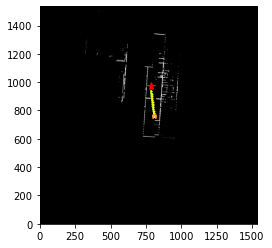

In [141]:
def transform_coord(path,grid_info):
    assert grid_info.shape[0] == 3
    if len(path.shape)==2:
        assert path.shape[1]==2
        org = grid_info[0:2]
        res = grid_info[2]
        return (path-org)/res
    elif len(path.shape)==1:
        assert path.shape[0]==2
        org = grid_info[0:2]
        res = grid_info[2]
        return (path-org)/res


res = test_org_res[test_idx][2]
org = (test_org_res[test_idx][0:2])

tf_init_path = transform_coord(test_init_data[test_idx],test_org_res[test_idx])
tf_opt_path = transform_coord(test_opt_data[test_idx],test_org_res[test_idx])
tf_car_odo = transform_coord(test_odo_data[test_idx][0:2],test_org_res[test_idx])
#(test_odo_data[test_idx][0:2]-org)/res
print(res,org)
print((test_org_res[test_idx].shape))


plt.figure()
plt.imshow(test_grid_data[test_idx],origin="lower",cmap='gray')
plt.plot(tf_init_path[:,0],tf_init_path[:,1],'o-', color='lawngreen',markersize=1, linewidth=1)
plt.plot(tf_opt_path[:,0],tf_opt_path[:,1],'o-', color='yellow',markersize=1, linewidth=1)
plt.plot(tf_car_odo[0],tf_car_odo[1],'r*', color = 'red',markersize=8)

plt.plot(tf_init_path[-1,0],tf_init_path[-1,1],'*', color='pink',markersize=4, linewidth=1)

sqr_offset = 10
box_x = [tf_init_path[-1,0]-sqr_offset,tf_init_path[-1,0]-sqr_offset,tf_init_path[-1,0]+sqr_offset,tf_init_path[-1,0]+sqr_offset]
box_y = [tf_init_path[-1,1]-sqr_offset,tf_init_path[-1,1]+sqr_offset,tf_init_path[-1,1]+sqr_offset,tf_init_path[-1,1]-sqr_offset]
plt.plot(box_x,box_y,color='orange')

"""
    #plt.plot(tf_init_path[-1,0]-sqr_offset,tf_init_path[-1,1]-sqr_offset,'*', color='magenta', markersize=2, linewidth=1)
    #plt.plot(tf_init_path[-1,0]-sqr_offset,tf_init_path[-1,1]+sqr_offset,'*', color='magenta', markersize=2, linewidth=1)
    #plt.plot(tf_init_path[-1,0]+sqr_offset,tf_init_path[-1,1]+sqr_offset,'*', color='magenta', markersize=2, linewidth=1)
    #plt.plot(tf_init_path[-1,0]+sqr_offset,tf_init_path[-1,1]-sqr_offset,'*', color='magenta', markersize=2, linewidth=1)


    #data_box = np.linspace()

    #x = np.arange(int(tf_init_path[-1,0])-10, int(tf_init_path[-1,0])+10, step=1)
    #y = np.arange(int(tf_init_path[-1,1])-10, int(tf_init_path[-1,1])+10,  step=1)
    #print((x,y))
    #xv, yv = np.meshgrid(x, y)

    #print(xv.shape,yv.shape)
"""

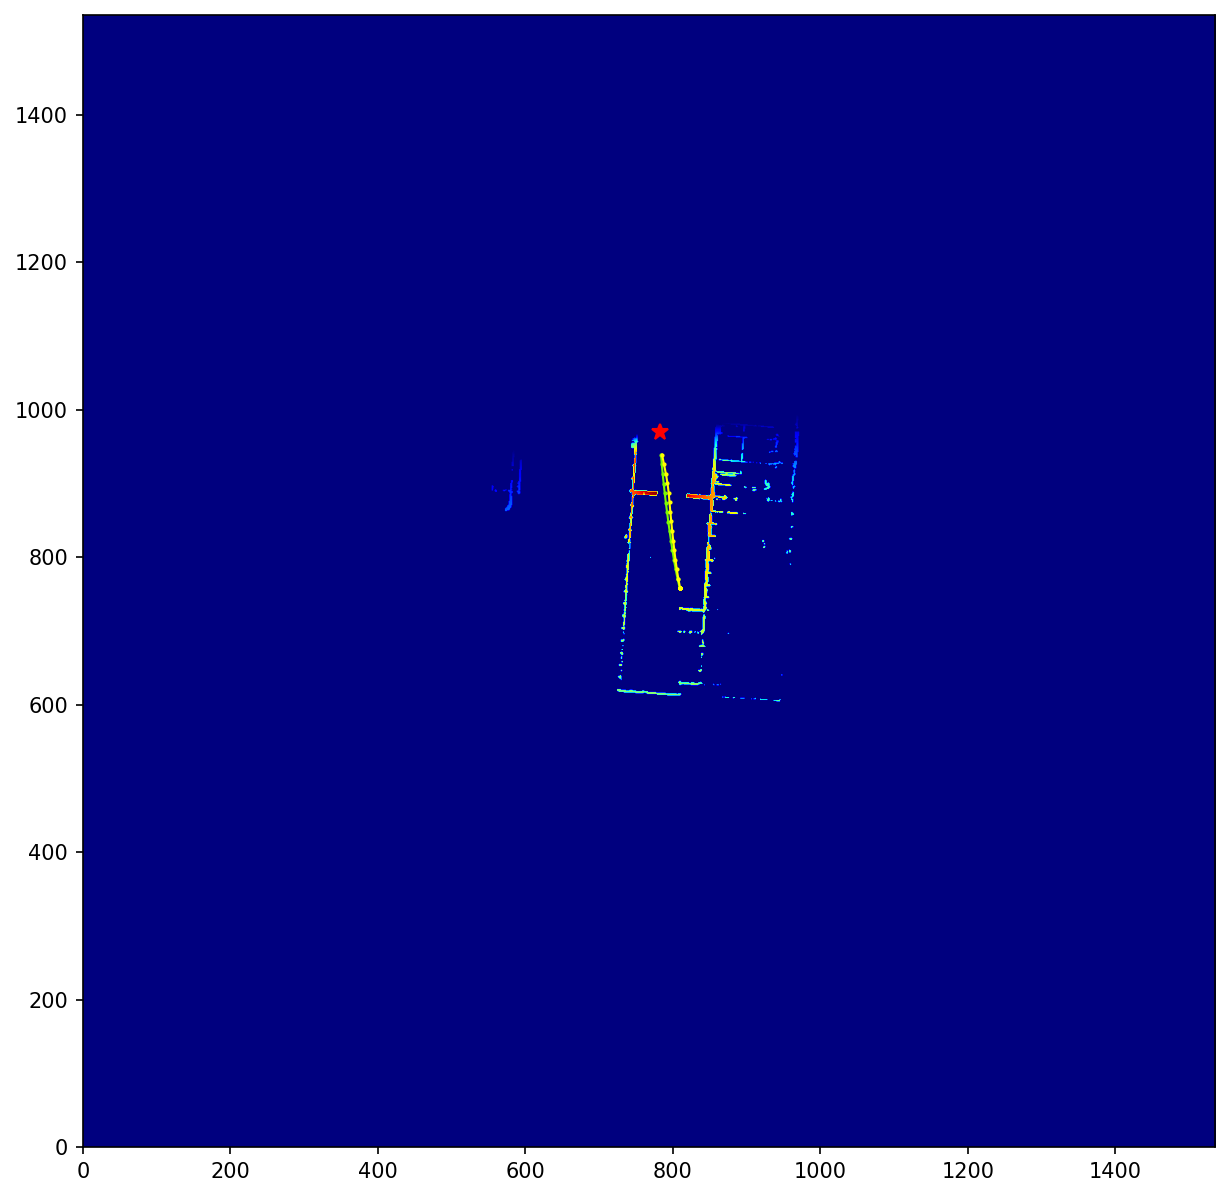

In [155]:

np_tst_gridmap = np.load(file=test_grid_path)['grid_data']
np_tst_grid_org_res = np.load(file=test_grid_path)['grid_org_res']
np_tst_init_path = np.load(file=test_init_path)['init_path']
np_tst_opt_path = np.load(file=test_opt_path)['opt_path']
np_tst_car_odo = np.load(file=test_odo_path)['odo_data']


def transform_coord(path,grid_info):
    assert grid_info.shape[0] == 3
    if len(path.shape)==2:
        assert path.shape[1]==2
        org = grid_info[0:2]
        res = grid_info[2]
        return (path-org)/res
    elif len(path.shape)==1:
        assert path.shape[0]==2
        org = grid_info[0:2]
        res = grid_info[2]
        return (path-org)/res


test_idx=66#58#45#0#75
test_data = {
    "grid_map": np_tst_gridmap[test_idx],
    "grid_org_res": np_tst_grid_org_res[test_idx],
    #"left_bnd": np_tst_left_bnd[test_idx],
    #"right_bnd": np_tst_right_bnd[test_idx],
    "init_path": np_tst_init_path[test_idx],
    "opt_path": np_tst_opt_path[test_idx],
    "car_odo": np_tst_car_odo[test_idx],
    #"predictions": predictions[test_idx],
    #"file_details": list_tst_file_details[test_idx],
    "testidx": test_idx,
}

test_data["init_path"] = transform_coord(test_data["init_path"],test_data["grid_org_res"])
test_data["opt_path"] = transform_coord(test_opt_data[test_idx],test_data["grid_org_res"])
test_data["car_odo"][0:2] = transform_coord(test_data["car_odo"][0:2],test_data["grid_org_res"])


def calc_direction_cost(car_coords:ndarray,endpoint_unit_normal:ndarray,vector:ndarray):
    direction = car_coords-vector
    direction_unit = direction/np.linalg.norm(x=direction)

    direction_cost = np.dot(direction_unit,endpoint_unit_normal)

    return direction_cost


def calc_costmap(gridmap:ndarray,gd_org_res:ndarray,car_odo:ndarray,initial_path:ndarray,include_dir_cost:bool=True,distance_mag:float=0.23)->ndarray:
    """Function to transfor grid map to cost map

    Args:
        gridmap (ndarray): Binary occupancy grid map
        car_odo (ndarray): [description]
        initial_path (ndarray): [description]
        distance_mag (float, optional): lower it is larger cost considered for the occupied cells. Defaults to 0.40.

    Returns:
        ndarray: [description]
    """
    
    car_coords = car_odo[0:2]
    end_coords = initial_path[-1]
    
    # Normalize coordinates to 0-1536 range
    #car_coords = (car_coords-gd_org_res[0:2])/gd_org_res[2]
    #end_coords = (end_coords-gd_org_res[0:2])/gd_org_res[2]

    # Initialize distance and direction costmap 
    dist_costmap = np.zeros(shape=(1536,1536))
    dir_costmap =  np.zeros(shape=(1536,1536))

    ################# calculate distance costmap ################
    
    # get occuppied cell indices
    (y,x) = np.where(gridmap==np.max(gridmap))
    # create coordinate pairs of location of occupied cells
    coords = np.array((x,y)).T

    # eucledian difference
    distance = np.square(coords-car_coords)
    distance = np.sum(distance, axis=1)
    distance = 1/(distance**distance_mag)
    dist_costmap[(y,x)]=distance

    ################# Direction cost map ######################
    
    if include_dir_cost:

        # end point direction
        direction_vector = car_coords-end_coords

        # unit vector between, car location and end point
        end_dir_unit = direction_vector/np.linalg.norm(x=direction_vector)

        # calculate dir cost for all occupied cell locations
        direction_cost= np.asarray([calc_direction_cost(car_coords=car_coords,endpoint_unit_normal=end_dir_unit,vector=coord) for coord in coords])

        # zero down all opposite directions to end point
        direction_cost[np.where(direction_cost<0)]=0.0

        dir_costmap[(y,x)] = direction_cost
    else:
        dir_costmap = np.ones(shape=(1536,1536))

    # pointwise multiply distance cost and direction cost
    costmap = dist_costmap*dir_costmap

    # normalize cost map between [0,1]
    costmap = costmap/np.max(costmap)
    #cp=r'C:\Users\Teja\Documents\_INFOTECH\Thesis\sample_Ros_bag\npzcostmaps'
    #np.savez_compressed(os.path.join(cp,file_details.decode("utf-8").split('/')[-1]),grid_data=costmap.astype(np.float16))
    return costmap.astype(float)

total_cost_map = calc_costmap(gridmap=test_data["grid_map"],gd_org_res=test_data["grid_org_res"],
                                car_odo=test_data["car_odo"],initial_path=test_data["init_path"],
                                include_dir_cost=True)
"""
    #car_coords = test_data["car_odo"][0:2]
    #end_coords = test_data["init_path"][-1]
    #print(car_coords,end_coords)
    #print(total_cost_map)
"""

plt.figure(figsize=(10,10),dpi=150)
plt.imshow(total_cost_map,origin="lower",cmap = 'jet')
#plt.subplot(1,2,1)
#plt.imshow(test_data["grid_map"],origin="lower",cmap='gray')
plt.plot(test_data["init_path"][:,0],test_data["init_path"][:,1],'o-', color='lawngreen',markersize=1, linewidth=1)
plt.plot(test_data["opt_path"][:,0],test_data["opt_path"][:,1],'o-', color='yellow',markersize=1, linewidth=1)
plt.plot(test_data["car_odo"][0],test_data["car_odo"][1],'r*', color = 'red',markersize=8)

## Draw boundaries to check offest dimensions

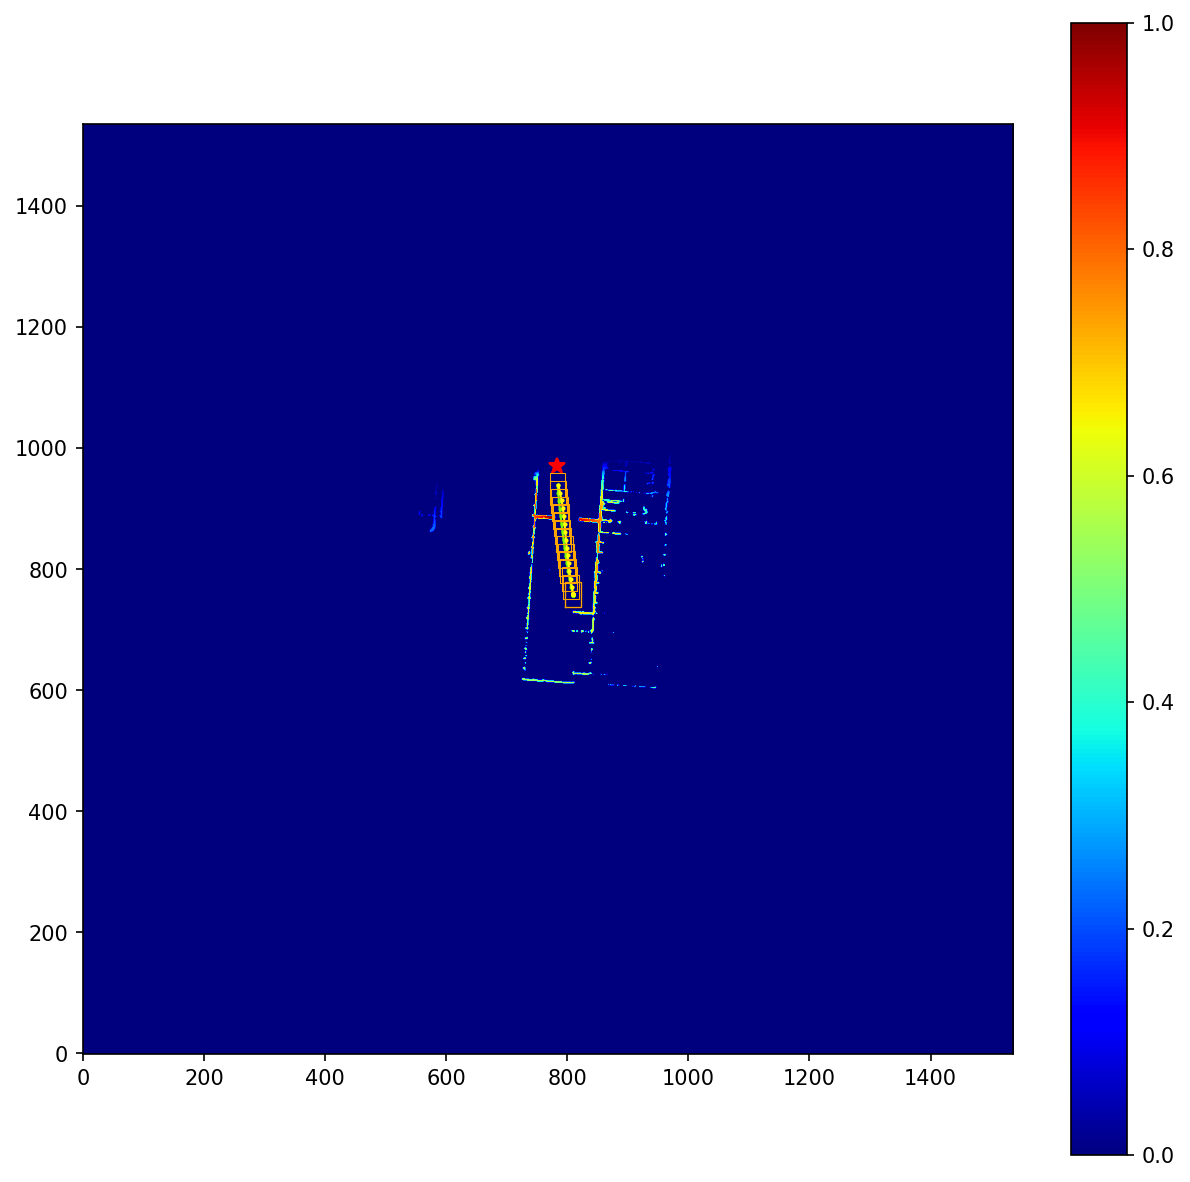

In [143]:
#plt.subplot(1,2,2)
plt.figure(figsize=(10,10),dpi=150)
plt.imshow(total_cost_map,origin="lower",cmap = 'jet')
plt.colorbar()
plt.plot(test_data["init_path"][:,0],test_data["init_path"][:,1],'o-', color='lawngreen',markersize=1, linewidth=1)
plt.plot(test_data["opt_path"][:,0],test_data["opt_path"][:,1],'o-', color='yellow',markersize=1, linewidth=1)
plt.plot(test_data["car_odo"][0],test_data["car_odo"][1],'r*', color = 'red',markersize=8)


xoff = 13
yoff = 20

point_idx = 3
for point_idx in range(25):
    pth_x = test_data["init_path"][point_idx,0]
    pth_y = test_data["init_path"][point_idx,1]
    box_x = [pth_x-xoff, pth_x-xoff, pth_x+xoff, pth_x+xoff, pth_x-xoff]
    box_y = [pth_y-yoff, pth_y+yoff, pth_y+yoff, pth_y-yoff, pth_y-yoff] 
    plt.plot(box_x,box_y,color='orange',linewidth=0.5)

In [144]:
def calc_costmap(gridmap:ndarray,car_odo:ndarray,initial_path:ndarray,include_dir_cost:bool,distance_mag:float=0.40)->ndarray:
    """Function to transfor grid map to cost map

    Args:
        gridmap (ndarray): Binary occupancy grid map
        car_odo (ndarray): [description]
        initial_path (ndarray): [description]
        distance_mag (float, optional): lower it is larger cost considered for the occupied cells. Defaults to 0.40.

    Returns:
        ndarray: [description]
    """
    
    car_coords = car_odo[0:2]
    end_coords = initial_path[-1]

    # Initialize distance and direction costmap 
    dist_costmap = np.zeros(shape=(1536,1536))
    dir_costmap =  np.zeros(shape=(1536,1536))

    ################# calculate distance costmap ################
    
    # get occuppied cell indices
    (y,x) = np.where(gridmap==1)
    # create coordinate pairs of location of occupied cells
    coords = np.array((x,y)).T

    # eucledian difference
    distance = np.square(coords-car_coords)
    distance = np.sum(distance, axis=1)
    distance = 1/(distance**distance_mag)

    dist_costmap[(y,x)]=distance

    ################# Direction cost map ######################
    # end point direction
    if include_dir_cost:
        direction_vector = car_coords-end_coords

        # unit vector between, car location and end point
        end_dir_unit = direction_vector/np.linalg.norm(x=direction_vector)

        # calculate dir cost for all occupied cell locations
        direction_cost= np.asarray([calc_direction_cost(car_coords=car_coords,endpoint_unit_normal=end_dir_unit,vector=coord) for coord in coords])

        # zero down all opposite directions to end point
        direction_cost[np.where(direction_cost<0)]=0.0
        #plt.hist(dir_cost)
        dir_costmap[(y,x)] = direction_cost
    else:
        dir_costmap = np.ones(shape=(1536,1536))

    # pointwise multiply distance cost and direction cost
    costmap = dist_costmap*dir_costmap

    # normalize cost map between [0,1]
    costmap = costmap/np.max(costmap)

    return costmap


## Calculate feature vector - Initital try

In [145]:
from typing import Tuple
from tqdm import trange
from time import time

def get_feature_vector(gridmap:ndarray,init_path:ndarray,offset):
    feature_vector = np.zeros(shape=(init_path.shape[0],4*offset[0]*offset[1]))
    # np.array(init_path.shape[0],4*offset[0]*offset[1])
    for i in trange(init_path.shape[0]):
        x_l,y_l = (init_path[i].astype(int)) - offset
        x_h,y_h = (init_path[i].astype(int)) + offset
        cell = 0
        #print("lower:",(x_l,y_l))
        #print("higher:",(x_h,y_h))

        for x in range(x_l,x_h):
            for y in range(y_l,y_h):
                #print(x,y)
                if cell<feature_vector.shape[1]:
                    #gridmap[row][column]
                    feature_vector[i][cell] = gridmap[y][x]
                    cell+=1
    return feature_vector

start = time()
fv = get_feature_vector(gridmap=total_cost_map,init_path = test_data["init_path"],offset= [13,20])
print(f'Time : {time()-start}')
print(fv.shape)
#sample = 

100%|██████████| 25/25 [00:00<00:00, 998.68it/s]

Time : 0.02796769142150879
(25, 1040)


In [148]:
test_data["init_path"]

array([[784.06380992, 938.86496399],
       [785.09112127, 925.84895587],
       [786.27220989, 912.84485845],
       [787.64253199, 899.85925003],
       [789.08482057, 886.88162126],
       [790.59907563, 873.91197214],
       [792.23865964, 860.95755884],
       [793.94016943, 848.01128454],
       [795.70360501, 835.07314921],
       [797.59342642, 822.15288698],
       [799.5622858 , 809.24469879],
       [801.61018314, 796.34858464],
       [803.8915685 , 783.49194147],
       [806.48244831, 770.70040557],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694],
       [809.38282258, 757.97397694]])

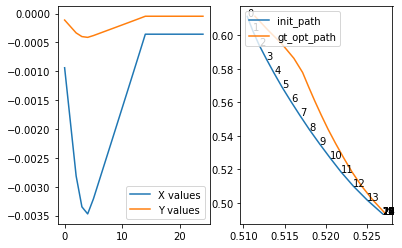

In [149]:
diff = test_data["init_path"]/1536-test_data["opt_path"]/1536

plt.subplot(1,2,1)
plt.plot(diff[:,0])
plt.plot(diff[:,1])
plt.legend(
    [
        "X values",
        "Y values",
    ],
    loc="lower right",
)

plt.subplot(1,2,2)
plt.plot((test_data["init_path"]/1536)[:,0],(test_data["init_path"]/1536)[:,1])
[plt.annotate(s=i,xy=(test_data["init_path"]/1536)[i]) for i in range(len(test_data["init_path"]))]
plt.plot((test_data["opt_path"]/1536)[:,0],(test_data["opt_path"]/1536)[:,1])
plt.legend(
    [
        "init_path",
        "gt_opt_path",
    ],
    loc="upper left",
)

In [151]:
print(np.unique(fv,return_index=True),"\n values:",len(np.unique(fv)))
#np.max(fv)
print(np.unique(fv,return_index=True,axis=0),"\n values:",len(np.unique(fv)))

(array([0.        , 0.96674716, 0.96966486, 0.97089471, 0.97241507,
       0.97387685, 0.97499528, 0.97510287, 0.97668707, 0.97815174,
       0.97932272, 0.97937312, 0.98102407, 0.98249109, 0.98370695,
       0.98371711, 0.98542775, 0.9862283 , 0.98689653, 0.98810593,
       0.98818019, 0.98989983, 0.99074575, 0.99136973, 0.9927138 ,
       0.9944421 , 0.99533565, 0.99731984, 1.        ]), array([   0, 3124, 3164, 3125, 3204, 3165, 3244, 3126, 3205, 3166, 3245,
       3127, 3206, 3167, 3128, 3246, 3207, 3286, 3168, 3129, 3247, 3208,
       3287, 3169, 3248, 3209, 3288, 3249, 3289], dtype=int64)) 
 values: 29
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([0, 5, 4, 3], dtype=int64)) 
 values: 29


In [351]:
np.unique(total_cost_map)

array([0.        , 0.00189861, 0.00194133, ..., 0.98960046, 0.99820392,
       1.        ])

In [78]:
print(fv[5])

[0. 0. 0. ... 0. 0. 0.]


## Create numpy array for feature vector and costmap and save them
### Do the following for all situations in all scenarios
* loop through whole numpy array of gridmap, init_path, opt_path, car_odo
* For each **gridmap**, **init_path**, **opt_path**, **car_odo** calculate **diff_path**, **cost_map**, **feature_vector** representing neighbours of each point

In [ ]:
from pathlib import Path
def load_data(np_file_path:Path,array_name:str)->ndarray:

    loaded_np = np.load(np_file_path)[array_name]

    return loaded_np